In [2]:
'''
Author: Renzo Vizarreta
Notebook date: December 21th, 2023.

- This is part of the closure test needed to complete the alignment.
- The tracking (production) has been run by Carlos using no alignment. 
- The tuples produced are studied here.
- To-do: Re-run the tracking using the xml with new constants.
- Notice that we see energies of around 2 MeV, which is still around 50% of what we want.
'''

# --- ROOT AND PLOTTING PACKAGES ---
# For instructions about downloading ROOT go to: https://root.cern/manual/python/
import ROOT
# For instructions about running the dunestyle go to: https://github.com/DUNE/dune_plot_style
import dunestyle.root as dunestyle
# Turn on the statistics box with basic information
ROOT.gStyle.SetOptStat(1)
ROOT.gStyle.SetStatW(0.2)  # Set the width
ROOT.gStyle.SetStatH(0.2)  # Set the height
ROOT.gStyle.SetStatX(0.8)  # Set the X position (right edge)
ROOT.gStyle.SetStatY(0.8)  # Set the Y position (top edge)
# Remove the border of the statistics box
ROOT.gStyle.SetStatBorderSize(0)
# ----------------------------------

In [16]:
files_path = '../RESOURCES/DATA/pass2_12_14_2023/'
chain = ROOT.TChain("nt", "nt")
chain.Add(files_path + '*')

canvas = ROOT.TCanvas("canvas", "Plot")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


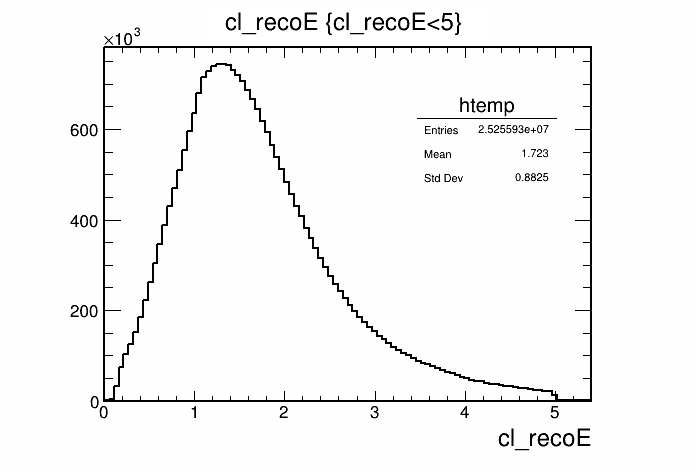

In [17]:
chain.Draw("cl_recoE","cl_recoE<5")
canvas.Draw()

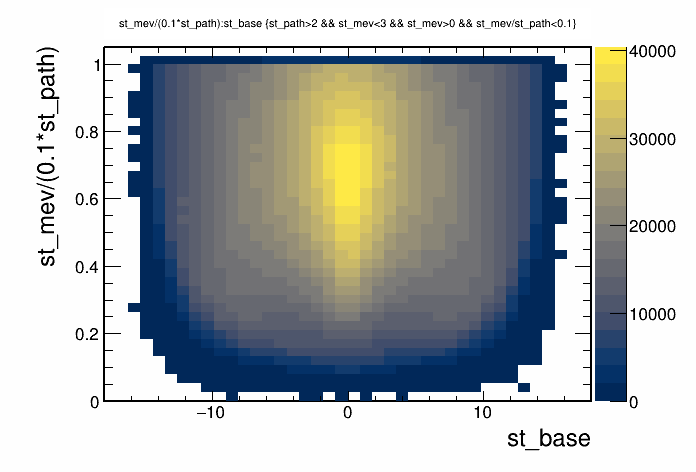

In [18]:
chain.Draw("st_mev/(0.1*st_path):st_base","st_path>2 && st_mev<3 && st_mev>0 && st_mev/st_path<0.1", "colz")
canvas.Draw()

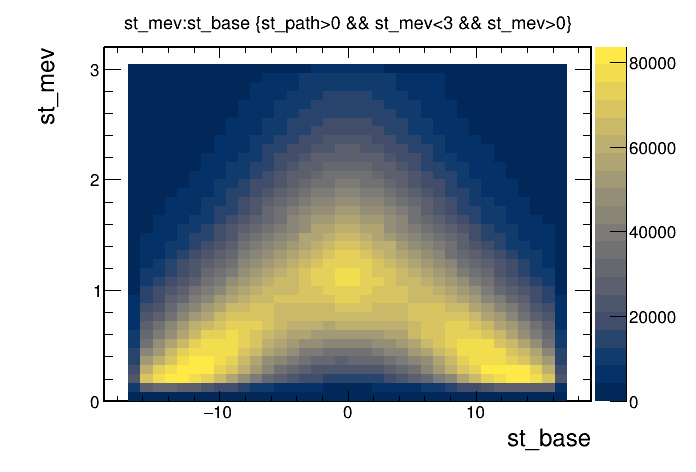

In [19]:
chain.Draw("st_mev:st_base","st_path>0 && st_mev<3 && st_mev>0", "colz")
canvas.Draw()

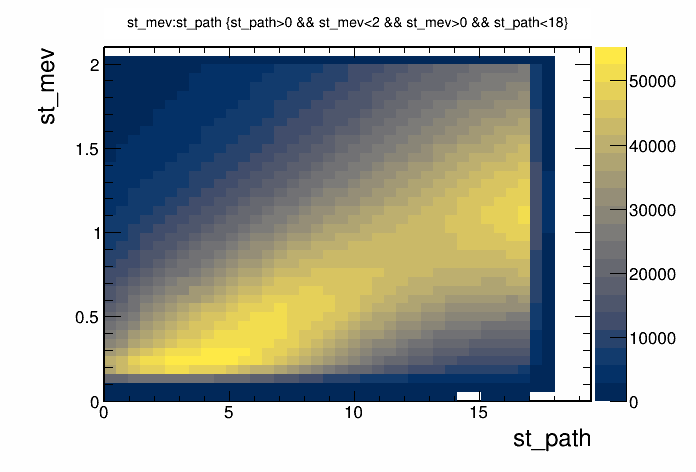

In [20]:
chain.Draw("st_mev:st_path","st_path>0 && st_mev<2 && st_mev>0 && st_path<18", "colz")
canvas.Draw()

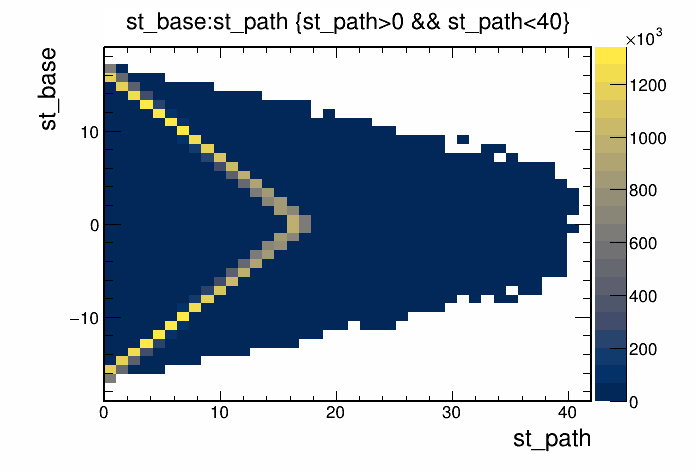

In [21]:
chain.Draw("st_base:st_path","st_path>0 && st_path<40", "colz")
#dunestyle.WIP()
canvas.Draw()

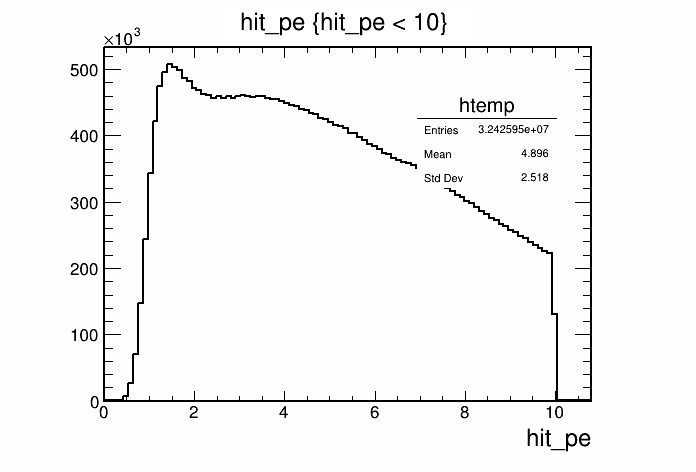

In [22]:
chain.Draw("hit_pe", "hit_pe < 10")
canvas.Draw()

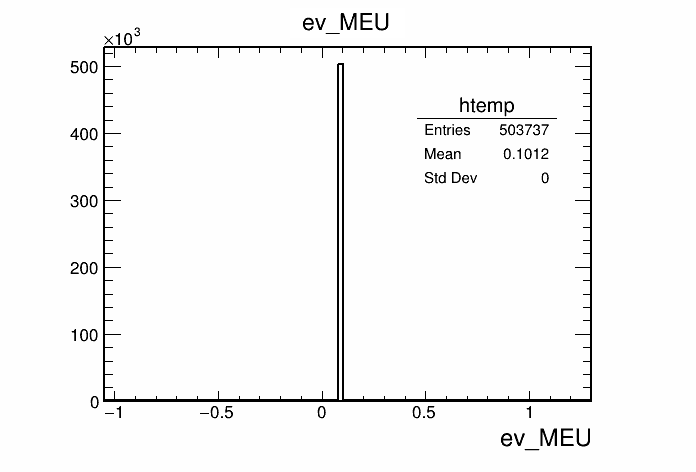

In [23]:
# From 11-10-23 advisor meeting: Ref value of 0.100484 0.001238
chain.Draw("ev_MEU")
canvas.Draw()

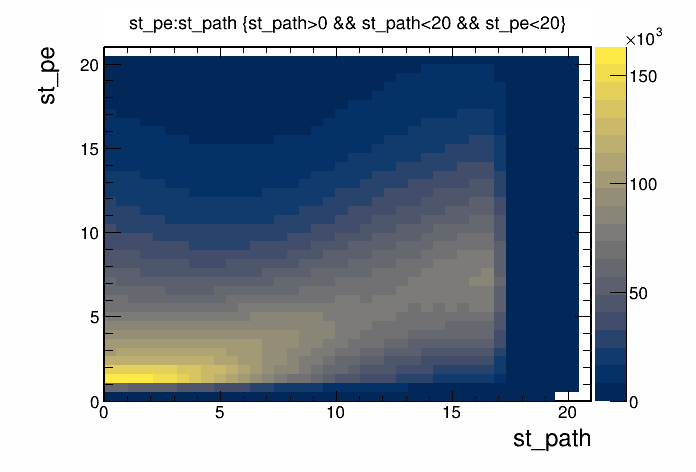

In [24]:
chain.Draw("st_pe:st_path","st_path>0 && st_path<20 && st_pe<20","colz")
canvas.Draw()

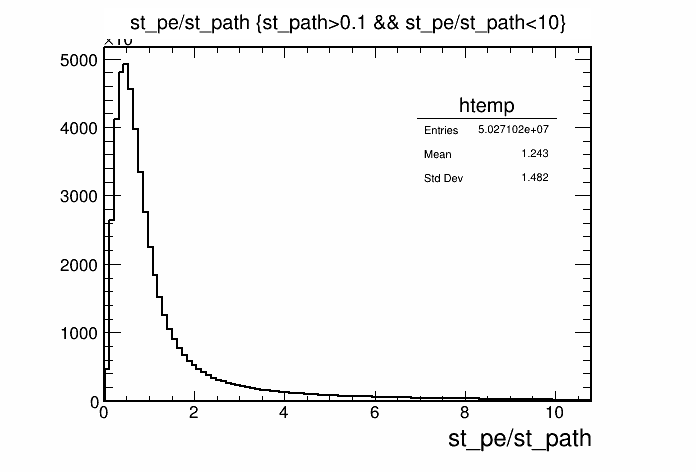

In [25]:
chain.Draw("st_pe/st_path","st_path>0.1 && st_pe/st_path<10")
canvas.Draw()

In [34]:
file_path = 'AlignmentRuns/26Dec2023/AlignmentConstants.txt'
shift, rotation = [], []
with open(file_path, 'r') as file:
    # Read each line and store it in the 'lines' list
    for line in file:
        shift.append(float(line.split(" ")[5]))  
        rotation.append(float(line.split(" ")[7])*1000) 

from array import array
# Creating .root file
root_file_name = 'AlignmentRuns/26Dec2023/constants.root'
root_file = ROOT.TFile(root_file_name, 'RECREATE')
# Create TTree objects
alignment_tree = ROOT.TTree('alignment constants', 'Tree shift')
# Create branch
plane_shift = array('f', [0]) 
plane_rotation = array('f', [0]) 
alignment_tree.Branch('shift', plane_shift, 'shift/F')
alignment_tree.Branch('rotation', plane_rotation, 'shift/F')

for i in range(len(shift)):
    plane_shift[0] = float(shift[i])
    plane_rotation[0] = float(rotation[i])
    alignment_tree.Fill()

alignment_tree.Write()
root_file.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


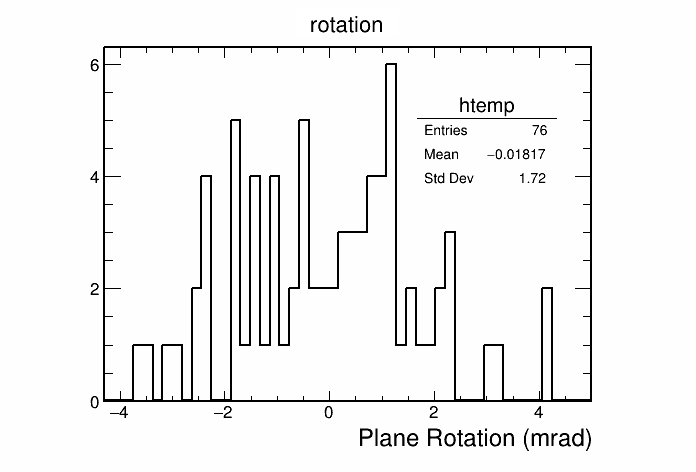

In [35]:
file = ROOT.TFile.Open(root_file_name)
tree = file.Get("alignment constants")
canvas = ROOT.TCanvas("canvas", "Plot")
tree.Draw("rotation")

histogram = ROOT.gPad.GetPrimitive("htemp")
histogram.GetYaxis().SetNdivisions(505)
x_axis_label = "Plane Rotation (mrad)"
histogram.GetXaxis().SetTitle(x_axis_label)
histogram.Rebin(2)

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


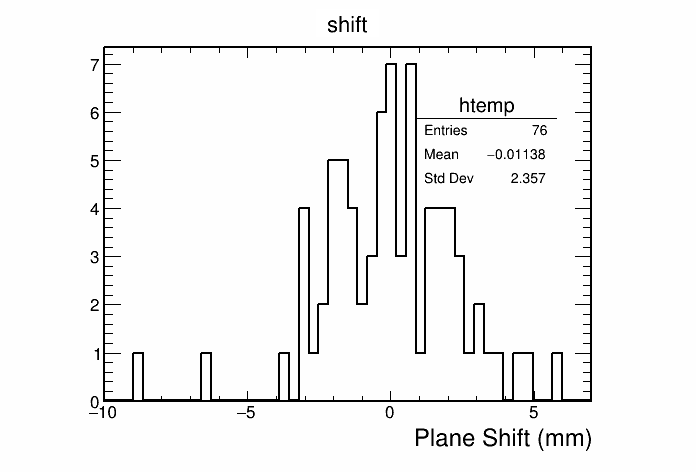

In [36]:
canvas = ROOT.TCanvas("canvas", "Plot")
tree.Draw("shift")

histogram = ROOT.gPad.GetPrimitive("htemp")
histogram.GetYaxis().SetNdivisions(508)
histogram.GetXaxis().SetNdivisions(508)
histogram.GetXaxis().SetRangeUser(-10, 10)
x_axis_label = "Plane Shift (mm)"
histogram.SetFillColor(0)
histogram.GetXaxis().SetTitle(x_axis_label)
histogram.Rebin(2)
#histogram.GetXaxis().SetTitleFont(43)
#histogram.SetLineColor(0)
canvas.Draw()